In [1]:
## download directory "common" from https://github.com/oreilly-japan/deep-learning-from-scratch
## or
## DIRECT ACCESS : download all files from https://github.com/oreilly-japan/deep-learning-from-scratch/tree/master/common and save them in a directory named "common".


#import sys, os
#sys.path.append(os.pardir)  
import seaborn as sns 
import pandas as pd
import numpy as np
import cv2  
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
from common.util import im2col, col2im

import func


# ----- # ----- # ----- # ----- # ----- #
# set_parameters
inp_chan = 1    # number of channel of input data
inp_wid = 224   # size of input data: input data dsize is (inp_wid, inp_wid, inp_chan)

inp_stride = 2  # stride in convolution layer
inp_pad = 0     # padding in convolution layer

w_wid = 7       # filter size is (w_wid, w_wid) 
# change the indicated part in func.make_filter when with different filter size



In [2]:
# ----- # ----- # ----- # ----- # ----- #
# set input figure
fig_file = 'sample1'  # inout_file_name

# conversion to black and white figure
im = cv2.imread(f'{fig_file}.png')
im2 = cv2.resize(im, dsize=(inp_wid, inp_wid))
im_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
im_gray = im_gray / 255.0
img = im_gray.reshape(1, inp_chan, *im_gray.shape)

"""
# show input figure
plt.imshow(im_gray, vmin = 0, vmax = 1, cmap = "gray")
plt.colorbar()
plt.show(); 
"""


# ----- # ----- # ----- # ----- # ----- #
# compute convolution layer and ReLU activation function
w_vrt, w_hrz = func.make_filter(w_wid)
out_Rall = np.concatenate([func.ReLU( func.convolution(img, w_vrt, w_wid, inp_stride, inp_pad) ), func.ReLU( func.convolution(img, w_hrz, w_wid, inp_stride, inp_pad) )], axis = 1)



stopped at 430 epoch


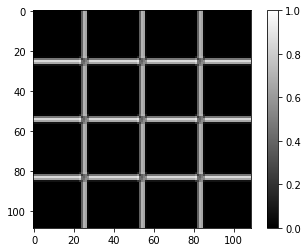

In [3]:
# ----- # ----- # ----- # ----- # ----- #
# set outout-target figure

out_inp = out_Rall 
tmp = len(out_inp[0,0])
# conversion to black and white figure
imans = cv2.imread(f'{fig_file}.png')
imans2 = cv2.resize(imans, dsize=(tmp, tmp))
imans_gray = cv2.cvtColor(imans2, cv2.COLOR_BGR2GRAY)
imans = imans_gray / 255.0

"""
# show target figure
plt.imshow(imans, vmin = 0, vmax = 1, cmap = "gray")
plt.colorbar()
plt.show(); 
"""


# ----- # ----- # ----- # ----- # ----- #
# training process of weight parameters in fully connected layer

# settings for with periodic stripe filters in Fig.1(1&2&3)
w_cycle_index = [14,25,42,51,56,71,76,85,102,113]
w_cycle = [0] * 2**7
for i in w_cycle_index :
    w_cycle[i] = 1


# training process
net = func.AffineNetwork(out_inp, imans)  #Neural Network initialization
optimizer = func.myAdam()    # optimization algorithm initialization
net.cyclic(w_cycle)     # set to periodic stripe filters

func.Train(500, net, optimizer, flr=0.01) # training process: up to 500 epochs 



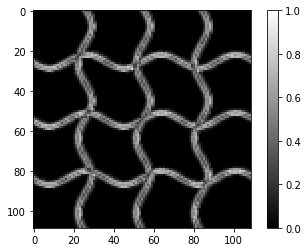

In [4]:
# ----- # ----- # ----- # ----- # ----- #
# change input to sinusoid curved grid

# set input figure and convert to black and white figure
fig_nn = 'sample2' 
im = cv2.imread(f'{fig_nn}.png') 
imn = cv2.resize(im, dsize=(inp_wid, inp_wid))
im_nn = cv2.cvtColor(imn, cv2.COLOR_BGR2GRAY)
im_nn = im_nn / 255.0
imgnn = im_nn.reshape(1, inp_chan, *im_nn.shape)


# compute convolution layer and ReLU activation function
outn_Rall = np.concatenate([func.ReLU( func.convolution(imgnn, w_vrt, w_wid, inp_stride, inp_pad) ), func.ReLU( func.convolution(imgnn, w_hrz, w_wid, inp_stride, inp_pad) )], axis = 1)


# set weight parameters trained with straight grid
w_fit = net.paramet()
net = func.AffineNetwork(outn_Rall, imans)
net.set_weight(w_fit)


# show output image for sinusoid curved grid input
plt.imshow(net.predict(), cmap = "gray", vmin = 0, vmax = 1)
plt.colorbar()
plt.show(); 
